## 0 导入包

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

## 1 定义数据

### 1.2 加载数据

In [3]:
from mnist import MNIST
data = MNIST(data_dir="MNIST/")
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [4]:
# 图片拉伸后的长度
img_size_flat = data.img_size_flat
# 图片的高、宽
img_shape = data.img_shape
# 类别数量
num_classes = data.num_classes

### 1.3 placeholder 占位符变量

In [5]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

### 1.4 需要优化的变量

In [6]:
weights = tf.Variable(tf.ones([img_size_flat, num_classes]))
biases = tf.Variable(tf.ones([num_classes]))

## 2 定义模型

In [7]:
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

## 3 损失

In [8]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)

### 3.1 优化

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

### 3.2 性能度量

In [10]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 4 训练运行

In [12]:
session = tf.Session()
session.run(tf.global_variables_initializer())

### 4.1 用来优化迭代的帮助函数

In [13]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        # 找损失函数绑定的元素
        # 回溯, 哪些节点相关的
        # 回溯, 哪些输入依赖的
        # 计算损失值
        # 计算梯队
        # 更新参数
        # 但是只更细一次参数

### 4.2 其他帮忙函数

In [14]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [15]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.y_test_cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [16]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)


    incorrect = (correct == False)
    
    # Get the images from the test-set that have been incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

### 4.3 展示性能的帮助函数

In [18]:
feed_dict_test = {x: data.x_test,
                  y_true: data.y_test,
                  y_true_cls: data.y_test_cls}

In [19]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

### 4.4 迭代

In [27]:
batch_size = 100

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)
optimize(num_iterations=100)

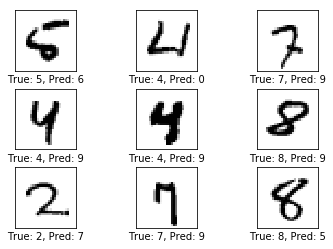

Accuracy on test-set: 86.2%


In [34]:
plot_example_errors()
print_accuracy()

[[ 964    0    0    2    0    8    5    0    0    1]
 [   0 1119    2    1    0    6    3    1    1    2]
 [  20    8  918   15   13    4   11    8   15   20]
 [   8    1   19  879    1   54    1    3    3   41]
 [   2    4    2    0  779    2    8    0    1  184]
 [  12    4    3   34    6  793   12    1    9   18]
 [  21    3    5    1   19   27  881    0    1    0]
 [   2   14   28    2    9    4    0  720    0  249]
 [  17   30   19   35    7  128   14    2  597  125]
 [  13    7    0    6    9    8    0    1    0  965]]


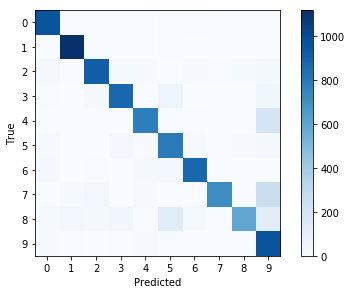

In [33]:
print_confusion_matrix()